In [54]:
import csv
import pandas as pd

In [55]:
task1 = open("task1.csv")
task2 = open("task2.csv")
task3 = open("task3.csv")
task4 = open("task4.csv")
tasks = [task1, task2, task3, task4]

In [56]:
raw_data = [i.readlines() for i in tasks]

In [75]:
def format_data(data):
    result = []
    for i in data:
        r = [k.strip(",") for k in i.strip("\n").strip(" ").strip(",").split(":")]
        r[1] = float(r[1])
        result.append(r)
    return result

In [123]:
data_dict = [{
    "test_name": i[1].strip("\n").strip(".").strip("Test Name:,"),
    "data": format_data(i[2:])
} for i in raw_data]

In [124]:
[i['test_name'] for i in data_dict]

['4.15.0-101-generic', '4.12.0-custo', '4.12.0-fault-around', '4.12.0-slab']

In [125]:
data_dict

[{'test_name': '4.15.0-101-generic',
  'data': [['ref          kbest', 2.1e-08],
   ['ref        average', 2.3e-08],
   ['cpu          kbest', 0.002481326],
   ['cpu        average', 0.002487435],
   ['getpid          kbest', 4.24e-07],
   ['getpid        average', 4.3e-07],
   ['send          kbest', 1.072e-06],
   ['send        average', 2.029e-06],
   ['recv          kbest', 7.43e-07],
   ['recv        average', 2.112e-06],
   ['big send          kbest', 1.0584e-05],
   ['big send        average', 1.8679e-05],
   ['big recv          kbest', 1.1785e-05],
   ['big recv        average', 2.63e-05],
   ['context siwtch          kbest', 4.826e-06],
   ['context siwtch        average', 4.917e-06],
   ['fork          kbest', 9.5034e-05],
   ['fork       average', 0.000189318],
   ['fork    Child kbest', 0.000155494],
   ['fork Child average', 0.000289966],
   ['thr create          kbest', 1.2318e-05],
   ['thr create       average', 2.5886e-05],
   ['thr create    Child kbest', 1.7912e-05],

In [126]:
cols = [i[0] for i in data_dict[0]["data"]]

In [127]:
heat_map_data = [[j[1] for j in i["data"]] for i in data_dict]

In [128]:
relative_boost = [[v / heat_map_data[1][j] for j, v in enumerate(u)] for i, u in enumerate(heat_map_data)]

In [131]:
test_names = [i["test_name"] for i in data_dict]

In [134]:
df = pd.DataFrame(heat_map_data, columns=cols)
df

,ref kbest,ref average,cpu kbest,cpu average,getpid kbest,getpid average,send kbest,send average,recv kbest,recv average,...,poll kbest,poll average,epoll kbest,epoll average,select big kbest,select big average,poll big kbest,poll big average,epoll big kbest,epoll big average
0,2.100000e-08,2.300000e-08,0.002481,0.002487,4.240000e-07,4.300000e-07,1.072000e-06,2.029000e-06,7.430000e-07,2.112000e-06,...,1.106000e-06,1.194000e-06,1.105000e-06,1.248000e-06,0.000101,0.000111,0.000098,0.000105,0.000100,0.000108
1,2.300000e-08,3.100000e-08,0.003394,0.003398,7.500000e-08,8.000000e-08,2.757000e-06,2.978000e-06,2.650000e-07,9.170000e-07,...,3.510000e-07,4.030000e-07,3.790000e-07,4.240000e-07,0.000044,0.000046,0.000044,0.000050,0.000043,0.000048
2,2.300000e-08,2.900000e-08,0.003394,0.003397,7.900000e-08,8.000000e-08,3.130000e-07,5.250000e-07,3.170000e-07,6.510000e-07,...,3.520000e-07,3.820000e-07,3.680000e-07,4.370000e-07,0.000044,0.000046,0.000045,0.000048,0.000043,0.000048
3,2.100000e-08,3.500000e-08,0.003133,0.003135,6.000000e-08,7.700000e-08,2.710000e-07,8.530000e-07,4.670000e-07,1.256000e-06,...,3.440000e-07,4.240000e-07,3.670000e-07,4.650000e-07,0.000049,0.000052,0.000047,0.000050,0.000046,0.000050


In [135]:
df = pd.DataFrame(relative_boost, columns=cols)
df

,ref kbest,ref average,cpu kbest,cpu average,getpid kbest,getpid average,send kbest,send average,recv kbest,recv average,...,poll kbest,poll average,epoll kbest,epoll average,select big kbest,select big average,poll big kbest,poll big average,epoll big kbest,epoll big average
0,0.913043,0.741935,0.730994,0.731960,5.653333,5.3750,0.388828,0.681330,2.803774,2.303162,...,3.150997,2.962779,2.915567,2.943396,2.321761,2.386724,2.211781,2.109369,2.328683,2.247469
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,1.000000,0.935484,0.999999,0.999717,1.053333,1.0000,0.113529,0.176293,1.196226,0.709924,...,1.002849,0.947891,0.970976,1.030660,1.003344,0.987178,1.007493,0.972251,1.012551,1.006811
3,0.913043,1.129032,0.923070,0.922483,0.800000,0.9625,0.098295,0.286434,1.762264,1.369684,...,0.980057,1.052109,0.968338,1.096698,1.128040,1.129369,1.069681,1.006244,1.083028,1.040322


In [122]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

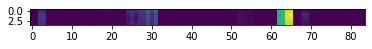

In [108]:
fig, ax = plt.subplots()
im = ax.imshow(heat_map_data)

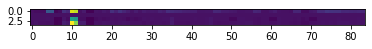

In [109]:
fig, ax = plt.subplots()
im = ax.imshow(relative_boost)